# Author LDA para Tweets de candidatos presidenciales 2017

Carga de datos con las siguientes estructuras:
* (array) docs_id: ["candidato_idtweet",....]
* (array) docs: ["tweew del candidato_idtweet", ...]
* (matrix) author2doc[candidato][#tweet] =  id_tweet

In [1]:
import os, re, io
import pandas as pd

In [162]:
# Carpeta que contiene los tweets
data_dir = 'tweets/'

files = os.listdir(data_dir)
print files

candidatos = []
docs_id = []
docs = []
author2doc = dict()

for filen in files:
    print filen
    candidato_file = re.split('_', filen)[:-1] ##cambiar files by filen
    print candidato_file
    candidato = ""
    if len(candidato_file) > 1:
        for c in candidato_file:
            candidato += c.strip()
    else:
        candidato = candidato_file[0].strip()
    print candidato
    candidatos.append(candidato)
    
    ids = []

    fileasd = pd.read_csv(data_dir + filen, header='infer', encoding = 'utf8' )
    for index, row in fileasd.iterrows():
        docs_id.append(candidato + '_' + str(row.id))

        tweet = row.text
        # Replace any whitespace (newline, tabs, etc.) by a single space.
        tweet = re.sub('\s', ' ', tweet)
        docs.append(tweet)

        ids.append(index)

    if not author2doc.get(candidato):
    # This is a new author.
        author2doc[candidato] = []
        # Add document IDs to author.
    author2doc[candidato].extend(ids)



for a, a_doc_ids in author2doc.items():
    for i, doc_id in enumerate(a_doc_ids):
        author2doc[a][i] = doc_id
        print a + ", " + str(i) + "=" + str(doc_id)

#print docs_id
print len(docs)

['sebastianpinera_tweets.csv', 'eduardo_artes_tweets.csv', 'joseantoniokast_tweets.csv', 'labeasanchez_tweets.csv', 'carolinagoic_tweets.csv', 'guillier_tweets.csv', 'marcoporchile_tweets.csv', 'senadornavarro_tweets.csv']
sebastianpinera_tweets.csv
['sebastianpinera']
sebastianpinera
eduardo_artes_tweets.csv
['eduardo', 'artes']
eduardoartes
joseantoniokast_tweets.csv
['joseantoniokast']
joseantoniokast
labeasanchez_tweets.csv
['labeasanchez']
labeasanchez
carolinagoic_tweets.csv
['carolinagoic']
carolinagoic
guillier_tweets.csv
['guillier']
guillier
marcoporchile_tweets.csv
['marcoporchile']
marcoporchile
senadornavarro_tweets.csv
['senadornavarro']
senadornavarro
sebastianpinera, 0=0
sebastianpinera, 1=1
sebastianpinera, 2=2
sebastianpinera, 3=3
sebastianpinera, 4=4
sebastianpinera, 5=5
sebastianpinera, 6=6
sebastianpinera, 7=7
sebastianpinera, 8=8
sebastianpinera, 9=9
sebastianpinera, 10=10
sebastianpinera, 11=11
sebastianpinera, 12=12
sebastianpinera, 13=13
sebastianpinera, 14=14


Tokenización especial para Tweeter

https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/
http://www.nltk.org/api/nltk.tokenize.html

In [163]:
from nltk.tokenize import TweetTokenizer
 
tknzr = TweetTokenizer()
print(tknzr.tokenize(docs[0]))

token = []
for tweet in docs:
    token.append(tknzr.tokenize(tweet))

token[10:]

[u'Gracias', u'#Atacama', u'y', u'a', u'los', u'33', u'que', u'nos', u'acompa\xf1aron', u'en', u'este', u'gran', u'd\xeda', u'.', u'Unidos', u'nada', u'es', u'imposible', u'.', u'Unidos', u'construiremos', u'\u2026', u'https://t.co/X4bQVv4WW1']


[[u'Democracia',
  u'en',
  u'#Venezuela',
  u'termin\xf3',
  u'de',
  u'ser',
  u'destruida',
  u'por',
  u'dictadura',
  u'del',
  u'Pte',
  u'Maduro.Debemos',
  u'apoyar',
  u'al',
  u'pueblo',
  u'venezolano',
  u'que',
  u'lucha',
  u'por',
  u'su',
  u'libertad'],
 [u'Nos',
  u'comprometemos',
  u'con',
  u'la',
  u'solidaridad',
  u'para',
  u'darle',
  u'una',
  u'mano',
  u'a',
  u'la',
  u'gran',
  u'familia',
  u'chilena',
  u'.',
  u'Ese',
  u'ser\xe1',
  u'el',
  u'ADN',
  u'de',
  u'nuestro',
  u'Gobi',
  u'\u2026',
  u'https://t.co/8ZZj4dxuCU'],
 [u'Nuestros',
  u'rezos',
  u'y',
  u'solidaridad',
  u'a',
  u'familias',
  u'v\xedctimas',
  u'de',
  u'atentado',
  u'en',
  u'#Barcelona',
  u'.',
  u'El',
  u'odio',
  u'y',
  u'la',
  u'violencia',
  u'terrorista',
  u'cobran',
  u'nuevas',
  u'vidas',
  u'inocentes',
  u'.'],
 [u'En',
  u'materia',
  u'Pensiones',
  u',',
  u'q',
  u'afecta',
  u'empleo',
  u'y',
  u'salarios',
  u'de',
  u'trabaj',
  u'y',
  u'calidad',


In [166]:
import nltk
from nltk.corpus import stopwords

import validators


stopwords = stopwords.words("spanish")

stopwords.append("rt")
stopwords.append("...")
stopwords.append("co")
stopwords.append("hoy")
stopwords.append("gran")
stopwords.append("gracias")
stopwords.append("ser")
stopwords.append("muchas")
stopwords.append("día")
stopwords.append("dia")
stopwords.append("si")
stopwords.append("hizo")
stopwords.append("voy")
stopwords.append("ver")
stopwords.append("ahora")
stopwords.append("mas")
stopwords.append("10")
stopwords.append("@equipokast")
stopwords.append("@joseantoniokast")
stopwords.append("@legadobi100")
stopwords.append("@luisramirez")

all_tokens = [t.lower() for tok in token for t in tok]
frec_dist = nltk.FreqDist(all_tokens) # frec distribution of tokens

# create list of list without stopwords
tokens = []
for doc in token: 
    t = []
    
    for tok in doc:
        if tok.lower() not in stopwords and len(tok.lower()) >= 2 and not validators.url(tok.lower()):# and frec_dist[token] >= 4:
            t.append(tok.lower())
    tokens.append(t)
            
print tokens[:2]
#print stopwords

frec_dist[0]

/home/fefi/.local/lib/python2.7/site-packages/ipykernel/__main__.py:40: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


[[u'#atacama', u'33', u'acompa\xf1aron', u'd\xeda', u'unidos', u'imposible', u'unidos', u'construiremos'], [u'recordamos', u'emoci\xf3n', u'orgullo', u'noticia', u'bien', u'refugio', u'33', u'chilenos', u'unimos']]


0

In [184]:
# Compute bigrams.
from gensim.models import Phrases
# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(tokens, min_count=20)
for idx in range(len(tokens)):
    for token in bigram[tokens[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            print token
            tokens[idx].append(token)


calidad_vida
@chile_vamos_
chile_necesita
adultos_mayores
día_internacional
clase_media
invito_leer
cada_día
invito_conocer
clase_media
calidad_vida
adultos_mayores
asamblea_constituyente
asamblea_constituyente
adultos_mayores
senador_guillier
@chile_vamos_
@chile_vamos_
feliz_cumpleaños
américa_latina
invito_conocer
chile_necesita
adultos_mayores
cada_vez
presidente_@sebastianpinera
calidad_vida
feliz_día
alejandro_guillier
comparto_uds
clase_media
presidenta_bachelet
chile_necesita
invito_conocer
cambio_climático
@sole_arellano
ex_presidente
@sole_arellano
invito_leer
@marcela_diazc
derechos_humanos
día_internacional
@en_causa
@en_causa
ex_presidente
ex_presidente
@tele13_radio
feliz_día
invito_conocer
adultos_mayores
feliz_día
américa_latina
@chile_vamos_
feliz_día
día_internacional
día_internacional
@alcalde_romero
feliz_cumpleaños
cada_día
chile_necesita
cambio_climático
cambio_climático
derechos_humanos
feliz_día
feliz_día
feliz_día
cambio_climático
ex_presidente
invito_conocer
c

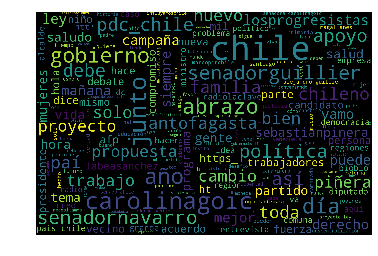

In [185]:
%matplotlib inline
from wordcloud import WordCloud
wc = ""
for doc in tokens:
    wc = wc +" ".join(doc)

import matplotlib.pyplot as plt

sw = {'https', 'http', 'co', 'así', 'si', 'ser', 'paí', 'mb', 'ahora', 'ma', 'tra'}
wordcloud = WordCloud(stopwords = sw, max_font_size=120, scale=2
                     , width=1200, height=800).generate(wc)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wc.jpg")

In [168]:
from gensim.corpora import Dictionary
dictionary = Dictionary(tokens)

_ = dictionary[0]  # This sort of "initializes" dictionary.id2token.

In [169]:
# Vectorize data.

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in tokens]


In [170]:
print('Number of authors: %d' % len(author2doc))
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of authors: 8
Number of unique tokens: 32854
Number of documents: 22154


Entrenar y seleccionar el modelo

In [172]:
%%time
from gensim.models import AuthorTopicModel
model = AuthorTopicModel(corpus=corpus, num_topics=5, id2word=dictionary.id2token, \
                author2doc=author2doc, passes=1, eval_every=0, random_state=1)

CPU times: user 42 s, sys: 80 ms, total: 42.1 s
Wall time: 42 s


If you believe your model hasn't converged, you can continue training using `model.update()`. If you have additional documents and/or authors call `model.update(corpus, author2doc)`.

Before we explore the model, let's try to improve upon it. To do this, we will train several models with different random initializations, by giving different seeds for the random number generator (`random_state`). We evaluate the topic coherence of the model using the [top_topics](https://radimrehurek.com/gensim/models/ldamodel.html#gensim.models.ldamodel.LdaModel.top_topics) method, and pick the model with the highest topic coherence.

In [126]:
%%time
model_list = []
for i in range(5):
    model = AuthorTopicModel(corpus=corpus, num_topics=5, id2word=dictionary.id2token, \
                    author2doc=author2doc, chunksize=2000, passes=100, gamma_threshold=1e-10, \
                    eval_every=0, iterations=1, random_state=i)
    top_topics = model.top_topics(corpus)
    tc = sum([t[1] for t in top_topics])
    model_list.append((model, tc))

CPU times: user 11min 36s, sys: 244 ms, total: 11min 36s
Wall time: 11min 36s


Se elige el con mayor coherencia

In [113]:
model, tc = max(model_list, key=lambda x: x[1])
print('Topic coherence: %.3e' %tc)

Topic coherence: -1.223e+03


In [178]:
# Save model.
model.save('model.atmodel')

In [179]:
# Load model.
model = AuthorTopicModel.load('model.atmodel')

Guardar topicos y topicos para cada candidato en json

In [174]:
for i in range(5):
    print "Topico "  + str(i) + ":"
    topic =  model.show_topic(i, topn=20)
    for j in topic:
        print j[0], j[1]

Topico 0:
chile 0.00731840887771
vamos 0.00433846559223
mañana 0.00407960181459
www.pinera2010.cl 0.00335036607165
bien 0.00269058917779
llegando 0.00268629355655
#kastpresidente 0.00262714442146
propuestas 0.00257289239985
saliendo 0.00256016411347
vuelta 0.00242441662719
gobierno 0.00225994338265
gira 0.00224214849769
comando 0.00222060965849
hrs 0.00212134840779
cecilia 0.00199395594761
kast 0.00195059835329
cambio 0.00194992342947
candidato 0.00194486698998
#volveracreer 0.00191508887686
reunion 0.00190970464637
Topico 1:
chile 0.0030241645564
#volveracreer 0.00205969266843
#kastpresidente 0.00190780069511
https 0.001740279247
eduardo 0.00148344628891
ley 0.00144507619914
inscripción 0.00144058219951
proyecto 0.00134291580787
minutos 0.00128428949245
artes 0.00127819569581
voto 0.00125943728444
marco 0.00125149820443
personas 0.00122409390854
familias 0.00116859838349
gobierno 0.00114446106746
15 0.00112779649638
salud 0.00111940580542
artés 0.00108743361734
nuevos 0.00108734767481

In [175]:
import json
data = {}

for i in range(5):
    data['Topico ' + str(i)] = model.show_topic(i)
    
with open('topicos.json', 'w') as outfile:
    json.dump(data, outfile)

Below, we use the model[name] syntax to retrieve the topic distribution for an author. Each topic has a probability of being expressed given the particular author, but only the ones above a certain threshold are shown.

In [176]:
for i in candidatos:
    print i, model[i]

data = {}
for i in candidatos:
    data[i] = model[i]
    
with open('topicos_candi.json', 'w') as outfile:
    json.dump(data, outfile)

sebastianpinera [(0, 0.11613718326075922), (1, 0.28858615972210322), (2, 0.16220909094629138), (3, 0.43306191777122677)]
eduardoartes [(1, 0.9959826290620023)]
joseantoniokast [(0, 0.50427773423704925), (2, 0.13866478081149622), (3, 0.35601376223309278)]
labeasanchez [(0, 0.20839470900213852), (1, 0.15468515960292234), (2, 0.29786315128050833), (3, 0.33903810011195268)]
carolinagoic [(0, 0.11551948917906273), (1, 0.041677696653677009), (2, 0.81332477649306645), (3, 0.029355321732005134)]
guillier [(0, 0.67887958813918026), (1, 0.02177945323906957), (2, 0.15203644671373112), (3, 0.14729758053096292)]
marcoporchile [(0, 0.40103969266471301), (1, 0.11880535533235571), (2, 0.25376369168478896), (3, 0.2263789637489016)]
senadornavarro [(0, 0.1206126538093819), (2, 0.059095337194590557), (3, 0.81533036804914361)]


Se muestra la relevancia de un candidato según la cantidad de Tweets

In [177]:
# Tell Bokeh to display plots inside the notebook.
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [180]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=2)
smallest_author = 0  # Ignore authors with documents less than this.
authors = [model.author2id[a] for a in model.author2id.keys() if len(model.author2doc[a]) >= smallest_author]
_ = tsne.fit_transform(model.state.gamma[authors, :])  # Result stored in tsne.embedding_

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 32.5 ms


In [181]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, ColumnDataSource

x = tsne.embedding_[:, 0]
y = tsne.embedding_[:, 1]
author_names = [model.id2author[a] for a in authors]

# Radius of each point corresponds to the number of documents attributed to that author.
scale = 0.00000001
author_sizes = [len(model.author2doc[a]) for a in author_names]
radii = [size * scale for size in author_sizes]

source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            author_names=author_names,
            author_sizes=author_sizes,
            radii=radii,
        )
    )

# Add author names and sizes to mouse-over info.
hover = HoverTool(
        tooltips=[
        ("author", "@author_names"),
        ("size", "@author_sizes"),
        ]
    )

print radii
print source

p = figure(tools=[hover, 'crosshair,pan,wheel_zoom,box_zoom,reset,save,lasso_select'])
p.scatter('x', 'y', radius='radii', source=source, fill_alpha=0.6, line_color=None)
show(p)

[2.648e-05, 3.2500000000000004e-05, 3.239e-05, 3.24e-05, 3.221e-05, 1.32e-06, 3.198e-05, 3.226e-05]
ColumnDataSource(id='7a1581de-6f05-4ea6-a049-7a217e287da3', ...)


Se obtiene la similitud entre candidatos

In [182]:
# Make a function that returns similarities based on the Hellinger distance.

from gensim import matutils
import pandas as pd

# Make a list of all the author-topic distributions.
author_vecs = [model.get_author_topics(author) for author in model.id2author.values()]

def similarity(vec1, vec2):
    '''Get similarity between two vectors'''
    dist = matutils.hellinger(matutils.sparse2full(vec1, model.num_topics), \
                              matutils.sparse2full(vec2, model.num_topics))
    sim = 1.0 / (1.0 + dist)
    return sim

def get_sims(vec):
    '''Get similarity of vector to all authors.'''
    sims = [similarity(vec, vec2) for vec2 in author_vecs]
    return sims

def get_table(name, top_n=10, smallest_author=1):
    '''
    Get table with similarities, author names, and author sizes.
    Return `top_n` authors as a dataframe.
    
    '''
    
    # Get similarities.
    sims = get_sims(model.get_author_topics(name))

    # Arrange author names, similarities, and author sizes in a list of tuples.
    table = []
    for elem in enumerate(sims):
        author_name = model.id2author[elem[0]]
        sim = elem[1]
        author_size = len(model.author2doc[author_name])
        if author_size >= smallest_author:
            table.append((author_name, sim, author_size))
            
    # Make dataframe and retrieve top authors.
    df = pd.DataFrame(table, columns=['Author', 'Score', 'Size'])
    df = df.sort_values('Score', ascending=False)[:top_n]
    
    return df

In [183]:
get_table('sebastianpinera')

,Author,Score,Size
6,sebastianpinera,1.000000,2648
4,labeasanchez,0.852054,3239
5,marcoporchile,0.776318,3240
7,senadornavarro,0.698088,3198
3,joseantoniokast,0.683287,3226
2,guillier,0.675714,3250
0,carolinagoic,0.646696,3221
1,eduardoartes,0.595377,132
